Prepare this data to model with multivariable regression (including data cleaning if necessary) according to this specification:

$$ Property crime = \alpha + Population + Population^2 + Murder + Robbery$$

The 'population' variable is already set for you, but you will need to create the last three features.  Robbery and Murder are currently continuous variables.  For this model, please use these variables to create  categorical features where values greater than 0 are coded 1, and values equal to 0 are coded 0.  You'll use this data and model in a later assignment- for now, just write the code you need to get the data ready.  Don't forget basic data cleaning procedures, either!  Do some graphing to see if there are any anomalous cases, and decide how you want to deal with them.

In [141]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


In [142]:
df = pd.read_csv('copieddata.csv')
#rename columns to be programmer friendly
df.columns = ['city', 'population', 'violent_crime',
       'murder_and_nonnegligent_manslaughter',
       'rape_revised', 'rape_legacy',
       'robbery', 'agg_assault', 'property_crime', 'burglary',
       'larceny_theft', 'motor_vehicle_theft', 'arson']
df.head()

,city,population,violent_crime,murder_and_nonnegligent_manslaughter,rape_revised,rape_legacy,robbery,agg_assault,property_crime,burglary,larceny_theft,motor_vehicle_theft,arson
0,Adams Village,"1,861",0,0,NaN,0,0,0,12,2,10,0,0.0
1,Addison Town and Village,"2,577",3,0,NaN,0,0,3,24,3,20,1,0.0
2,Akron Village,"2,846",3,0,NaN,0,0,3,16,1,15,0,0.0
3,Albany,"97,956",791,8,NaN,30,227,526,"4,090",705,"3,243",142,NaN
4,Albion Village,"6,388",23,0,NaN,3,4,16,223,53,165,5,NaN


In [143]:
df.dtypes

city                                     object
population                               object
violent_crime                            object
murder_and_nonnegligent_manslaughter      int64
rape_revised                            float64
rape_legacy                              object
robbery                                  object
agg_assault                              object
property_crime                           object
burglary                                 object
larceny_theft                            object
motor_vehicle_theft                      object
arson                                   float64
dtype: object

In [144]:

#convert to appropriate types
df['population'] = df.population.str.replace(',', '').astype('float')
df['violent_crime'] = df.violent_crime.str.replace(',', '').astype('float')
df['murder_and_nonnegligent_manslaughter'] = df.murder_and_nonnegligent_manslaughter.astype('float')
df.drop(columns=['rape_revised'], inplace=True)
df['rape_legacy'] = df.rape_legacy.str.replace(',', '').astype('float')
df['robbery'] = df.robbery.str.replace(',', '').astype('float')
df['agg_assault'] = df.agg_assault.str.replace(',', '').astype('float')
df['property_crime'] = df.property_crime.str.replace(',', '').astype('float')
df['burglary'] = df.burglary.str.replace(',', '').astype('float')
df['larceny_theft'] = df.larceny_theft.str.replace(',', '').astype('float')
df['motor_vehicle_theft'] = df.motor_vehicle_theft.str.replace(',', '').astype('float')

In [147]:
df.dtypes

city                                     object
population                              float64
violent_crime                           float64
murder_and_nonnegligent_manslaughter    float64
rape_legacy                             float64
robbery                                 float64
agg_assault                             float64
property_crime                          float64
burglary                                float64
larceny_theft                           float64
motor_vehicle_theft                     float64
arson                                   float64
dtype: object

In [148]:
df.shape

(348, 12)

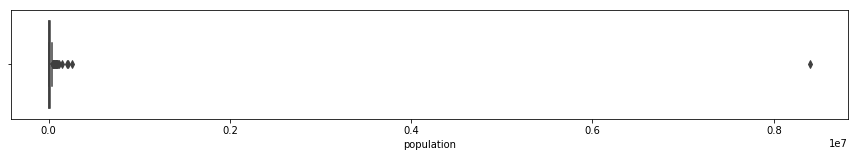

In [149]:
#Let's see our population range
plt.figure(figsize=(15,2))
sns.boxplot(df['population'])
plt.show()

In [150]:
#that's no good. let's try this without New York, which is way too big to put into the same model as the rest of this data

In [151]:
dfny = df[df.city != 'New York']
dfny.shape

(347, 12)

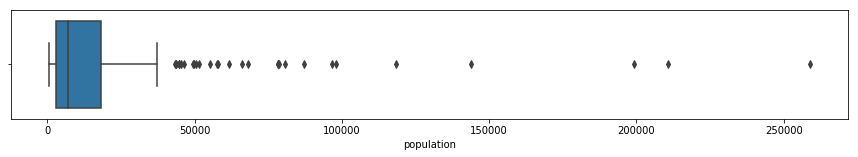

In [152]:
plt.figure(figsize=(15,2))
sns.boxplot(dfny['population'])
plt.show()

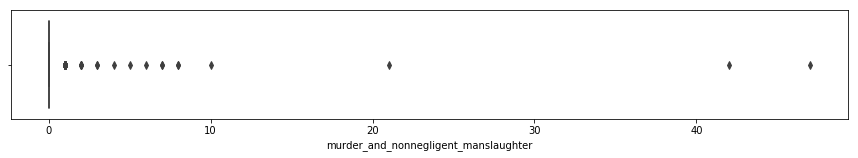

In [154]:
#Some other basic exploration
plt.figure(figsize=(15,2))
sns.boxplot(dfny['murder_and_nonnegligent_manslaughter'])
plt.show()

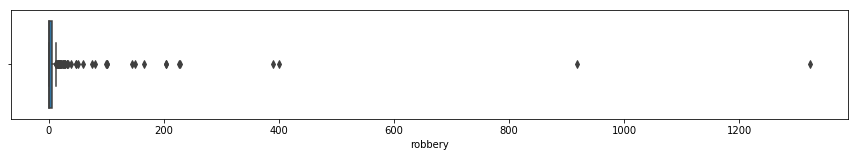

In [155]:
plt.figure(figsize=(15,2))
sns.boxplot(dfny['robbery'])
plt.show()

In [156]:
#Create features per the original assignment
features = dfny[['city', 'population', 'property_crime']]
features = features.assign(pop2 = features.population **2)

In [157]:
features = features.assign(murder = np.where(dfny['murder_and_nonnegligent_manslaughter'] >0,1,0))
features = features.assign(robbery = np.where(dfny['robbery'] >0, 1,0))
features.head()

,city,population,property_crime,pop2,murder,robbery
0,Adams Village,1861.0,12.0,3.463321e+06,0,0
1,Addison Town and Village,2577.0,24.0,6.640929e+06,0,0
2,Akron Village,2846.0,16.0,8.099716e+06,0,0
3,Albany,97956.0,4090.0,9.595378e+09,1,1
4,Albion Village,6388.0,223.0,4.080654e+07,0,1


# Using this data, build a regression model to predict property crimes. You can use the features you prepared in the previous assignment, new features of your own choosing, or a combination. The goal here is prediction rather than understanding mechanisms, so the focus is on creating a model that explains a lot of variance.

In [158]:
from sklearn import linear_model
import statsmodels.formula.api as smf
import math

In [159]:
df.columns

Index(['city', 'population', 'violent_crime',
       'murder_and_nonnegligent_manslaughter', 'rape_legacy', 'robbery',
       'agg_assault', 'property_crime', 'burglary', 'larceny_theft',
       'motor_vehicle_theft', 'arson'],
      dtype='object')


Coefficients: 
 [4.12734676]

Intercept: 
 174.37729303836022

R-squared:
0.8918008240850744


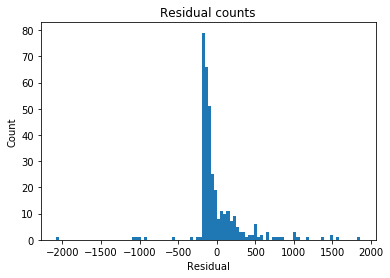

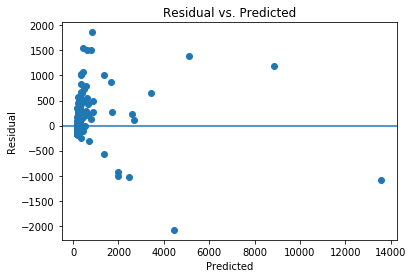

,violent_crime
violent_crime,1.0


In [160]:
#Attempt 1
regr = linear_model.LinearRegression()
Y = dfny['property_crime']
X = dfny[['violent_crime']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

#check multivariate normality
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = dfny['property_crime']

# Calculate the error, also called the residual.
residual = actual - predicted

#check multivariate normality
plt.hist(residual, bins=100)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

#check scedasticity
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()


#check multicollinearity
correlation_matrix = X.corr()
display(correlation_matrix)

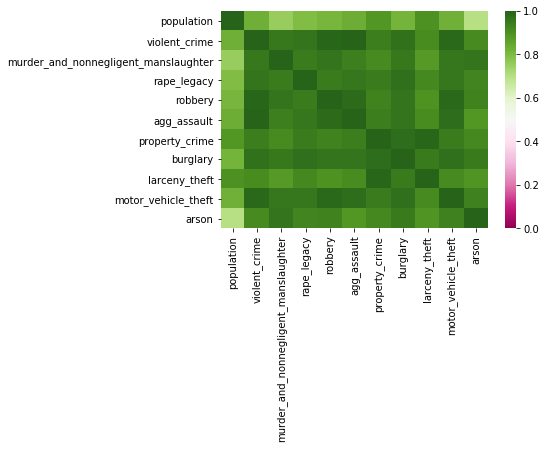

In [161]:
#This has multivariate normality problems. small cities are being overpredicted and large cities are underpredicted

#Let's check the correlation heatmap

sns.heatmap(dfny.corr(), vmin=0, cmap="PiYG")

In [163]:
#Attempt 2 - #Larceny is the strongest correlation to property crime, so let's see what that looks like
regr = linear_model.LinearRegression()
Y = dfny['property_crime']
X = dfny[['larceny_theft']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [1.43843736]

Intercept: 
 -44.332318841997505

R-squared:
0.9892933480458743


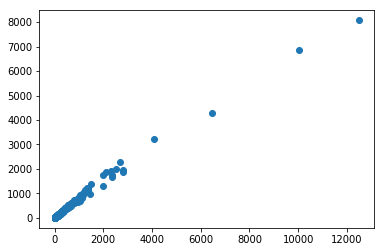

In [164]:
#check linearity
plt.scatter(dfny.property_crime, dfny.larceny_theft)
plt.show()

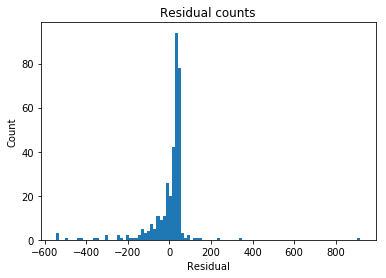

In [165]:
#check multivariate normality
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = dfny['property_crime']

# Calculate the error, also called the residual.
residual = actual - predicted

#nor awful but seems a little skewed
plt.hist(residual, bins=100)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

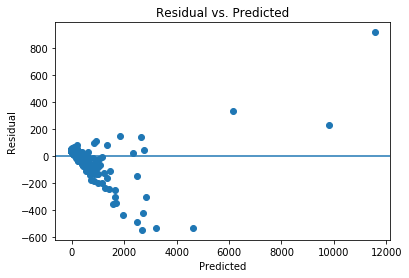

In [166]:
#check scedasticity
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()


In [167]:
#That's quite bad


Coefficients: 
 [1.29510871e-02 1.14920528e-07 1.95038666e+02 9.28205845e+01]

Intercept: 
 -16.815866321663066

R-squared:
0.8444937611173492


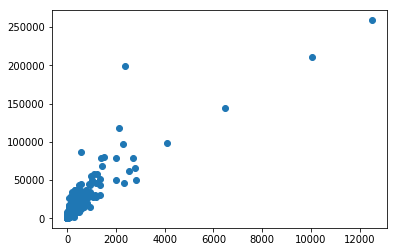

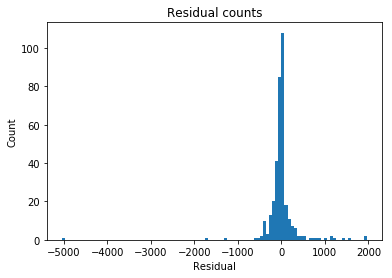

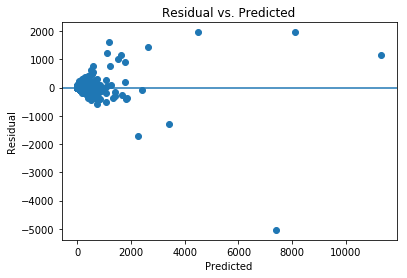

,population,pop2,murder,robbery
population,1.000000,0.888582,0.502713,0.344347
pop2,0.888582,1.000000,0.344873,0.152289
murder,0.502713,0.344873,1.000000,0.310503
robbery,0.344347,0.152289,0.310503,1.000000


In [168]:
#Attempt 3 using the originally assigned features:
regr = linear_model.LinearRegression()
Y = features['property_crime']
X = features[['population', 'pop2', 'murder', 'robbery']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))
#check linearity
plt.scatter(features.property_crime, features.population)
plt.show()

#check multivariate normality
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = features['property_crime']

# Calculate the error, also called the residual.
residual = actual - predicted

#check multivariate normality
plt.hist(residual, bins=100)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

#check scedasticity
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()


#check multicollinearity
correlation_matrix = X.corr()
display(correlation_matrix)

In [169]:
#Not bad, though the larger cities are still not great

In [170]:
dfny.columns

Index(['city', 'population', 'violent_crime',
       'murder_and_nonnegligent_manslaughter', 'rape_legacy', 'robbery',
       'agg_assault', 'property_crime', 'burglary', 'larceny_theft',
       'motor_vehicle_theft', 'arson'],
      dtype='object')

In [171]:
#Use PCA on several other crime items to predict property crime
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
crime = dfny[['violent_crime', 'murder_and_nonnegligent_manslaughter', 'rape_legacy', 'robbery', 'agg_assault', 'burglary'
             , 'larceny_theft', 'motor_vehicle_theft']]
S = StandardScaler().fit_transform(crime)


In [172]:
St = S.T
Cx = np.cov(St)
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

In [173]:
# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].reshape(1, 8).T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print(
    'The percentage of total variance in the dataset explained by each',
    'component calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov)
)

Eigenvector 1: 
[[-0.35820137]
 [-0.34985744]
 [-0.35307405]
 [-0.35643112]
 [-0.35590089]
 [-0.35699338]
 [-0.34006579]
 [-0.35753695]]
Eigenvalue 1: 7.702914656761019
----------------------------------------
Eigenvector 2: 
[[ 0.20266952]
 [ 0.27941353]
 [-0.09578768]
 [ 0.30607455]
 [ 0.14667777]
 [-0.18870679]
 [-0.83564497]
 [ 0.15023018]]
Eigenvalue 2: 0.1503854306337862
----------------------------------------
Eigenvector 3: 
[[ 0.31098501]
 [-0.71040826]
 [-0.29431104]
 [ 0.19724078]
 [ 0.47104158]
 [-0.18008459]
 [ 0.0863402 ]
 [ 0.10639665]]
Eigenvalue 3: 0.07642452603034493
----------------------------------------
Eigenvector 4: 
[[ 0.01686911]
 [-0.36547888]
 [ 0.80593643]
 [-0.25825434]
 [ 0.16475505]
 [ 0.0718532 ]
 [-0.31624186]
 [-0.13264906]]
Eigenvalue 4: 0.050654478915381135
----------------------------------------
Eigenvector 5: 
[[-8.27763984e-01]
 [ 1.29658548e-02]
 [ 3.75676081e-02]
 [ 3.32174169e-01]
 [ 4.50430538e-01]
 [-4.25702367e-14]
 [ 8.63195463e-15]
 [ 7.

In [174]:
#96% explained by the first component. Easily keep that one and toss the rest.
P = eig_vec_cov[:, 0]

# Transform X into Y.
Y = P.T.dot(St)
features['crime'] = Y



Coefficients: 
 [-361.48525323]

Intercept: 
 385.7521613832853

R-squared:
0.940773775798779


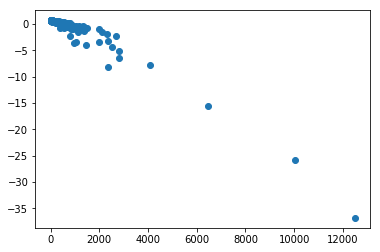

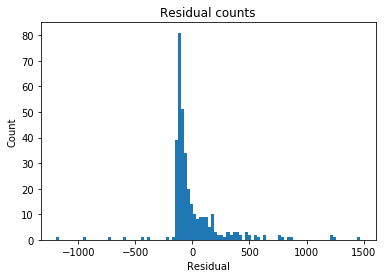

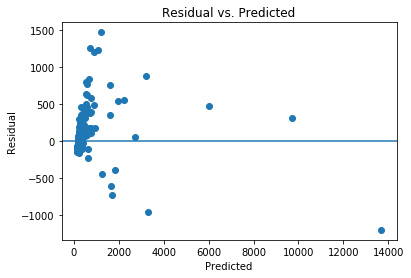

In [176]:
#Regression attempt with just this feature
regr = linear_model.LinearRegression()
Y = features['property_crime']
X = features[['crime']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))
#check linearity
plt.scatter(features.property_crime, features.crime)
plt.show()

#check multivariate normality
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = features['property_crime']

# Calculate the error, also called the residual.
residual = actual - predicted

#check multivariate normality
plt.hist(residual, bins=100)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

#check scedasticity
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()



In [179]:
#Our residual is still not normally distributed. let's try to correct so that the larger cities have smaller errors and smaller
#cities have larger errors. 

#Create new feature that's defined as each population value over it's the mean of all of them
features['big'] = [x / features.population.mean() for x in features['population']]
features.head()

,city,population,property_crime,pop2,murder,robbery,crime,big
0,Adams Village,1861.0,12.0,3.463321e+06,0,0,0.682761,0.116628
1,Addison Town and Village,2577.0,24.0,6.640929e+06,0,0,0.658510,0.161500
2,Akron Village,2846.0,16.0,8.099716e+06,0,0,0.668880,0.178358
3,Albany,97956.0,4090.0,9.595378e+09,1,1,-7.807937,6.138869
4,Albion Village,6388.0,223.0,4.080654e+07,0,1,0.320755,0.400334



Coefficients: 
 [-284.00097051  150.98936999]

Intercept: 
 234.76279138978512

R-squared:
0.9589197858706376


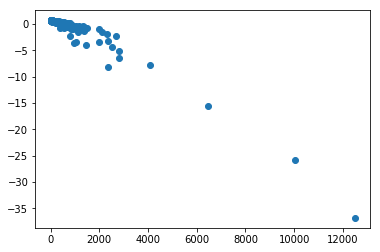

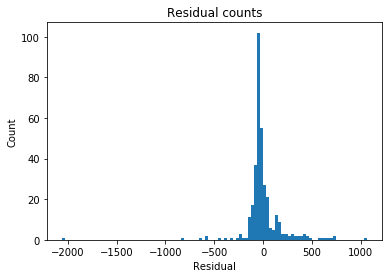

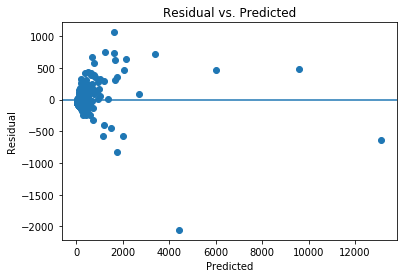

,crime,big
crime,1.000000,-0.839238
big,-0.839238,1.000000


In [181]:
# Try again using this feature as well as the original 5-crime PCA component
regr = linear_model.LinearRegression()
Y = features['property_crime']
X = features[['crime', 'big']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))
#check linearity
plt.scatter(features.property_crime, features.crime)
plt.show()

#check multivariate normality
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = features['property_crime']

# Calculate the error, also called the residual.
residual = actual - predicted

#check multivariate normality
plt.hist(residual, bins=100)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

#check scedasticity
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()


#check multicollinearity
correlation_matrix = X.corr()
display(correlation_matrix)

In [182]:
##Not perfect but clearly the best attempt yet. one more:

In [183]:
#try regression with the PCA component and also the sqrt of population
features['sqrtpop'] = [math.sqrt(x) for x in features['population']]
features.head()

,city,population,property_crime,pop2,murder,robbery,crime,big,sqrtpop
0,Adams Village,1861.0,12.0,3.463321e+06,0,0,0.682761,0.116628,43.139309
1,Addison Town and Village,2577.0,24.0,6.640929e+06,0,0,0.658510,0.161500,50.764161
2,Akron Village,2846.0,16.0,8.099716e+06,0,0,0.668880,0.178358,53.347915
3,Albany,97956.0,4090.0,9.595378e+09,1,1,-7.807937,6.138869,312.979233
4,Albion Village,6388.0,223.0,4.080654e+07,0,1,0.320755,0.400334,79.924965



Coefficients: 
 [-311.72632834    2.95119523]

Intercept: 
 76.7059091067336

R-squared:
0.9636910242031071


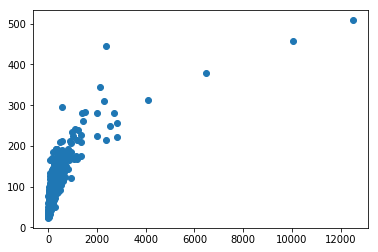

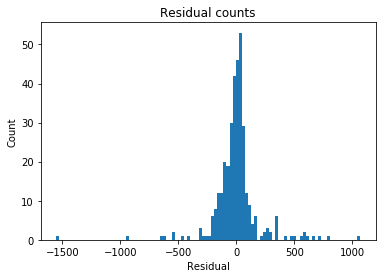

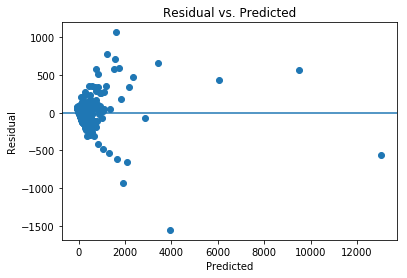

,crime,sqrtpop
crime,1.00000,-0.66145
sqrtpop,-0.66145,1.00000


In [184]:
regr = linear_model.LinearRegression()
Y = features['property_crime']
X = features[['crime', 'sqrtpop']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))
#check linearity
plt.scatter(features.property_crime, features.sqrtpop)
plt.show()

#check multivariate normality
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = features['property_crime']

# Calculate the error, also called the residual.
residual = actual - predicted

#check multivariate normality
plt.hist(residual, bins=100)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

#check scedasticity
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()


#check multicollinearity
correlation_matrix = X.corr()
display(correlation_matrix)

# Summary

The best model needs only 2 features:
* a single primary component created using all the other crime stats  
* The square root of the population. taking the root eliminates the extremity of some of the larger values and enables a linear regression to be valid for the range of cities, as long as NYC itself is excluded.